In [2]:
!pip install keras


In [1]:
# importing necessary lib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [ ]:
df=pd.read_excel('final.xlsx')

In [ ]:
df.head()

In [ ]:
df= df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

In [ ]:
df.dtypes

Day                         object
Day of week                  int64
Cost                       float64
Impressions                  int64
Clicks                       int64
CTR                        float64
Avg. CPC                   float64
Conversions                float64
Conv. rate                 float64
Cost / conv.               float64
Search Impr. share         float64
Search Lost IS (rank)      float64
Search Lost IS (budget)    float64
Zip                          int64
Income                     float64
lat                        float64
lng                        float64
dtype: object

In [ ]:
np.isnan(df['Search Impr. share']).sum()

0

In [ ]:
df['Day']=pd.to_datetime(df['Day'],infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7febdc3bc358>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

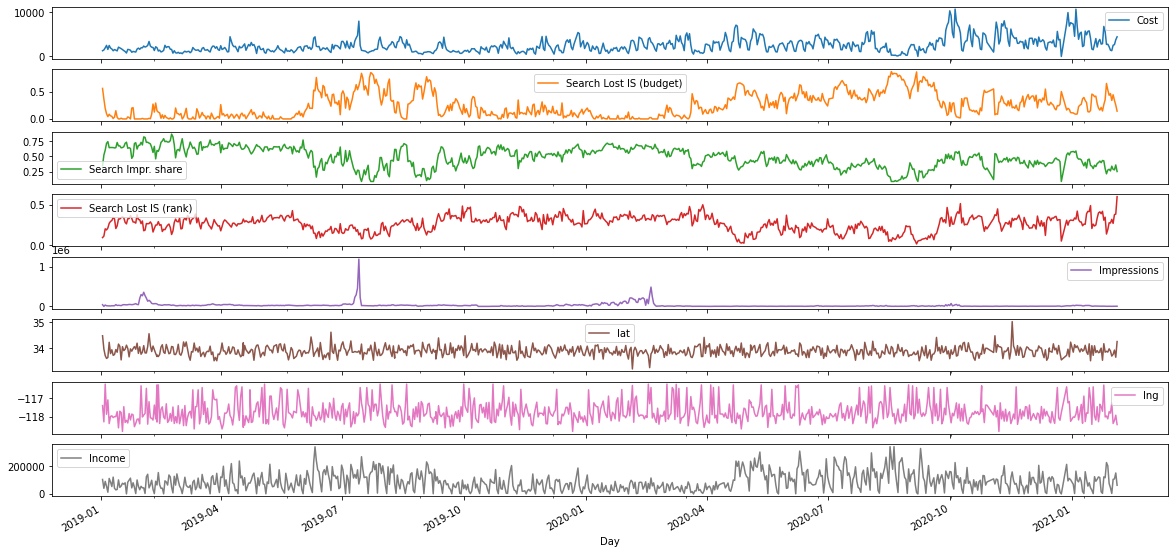

In [ ]:
plt.figure(figsize=(20,10))

df.set_index('Day')[['Cost','Search Lost IS (budget)','Search Impr. share','Search Lost IS (rank)','Impressions','lat','lng','Income']].plot(subplots=True,figsize=(20,10))

In [ ]:
df_input= df.drop(['Day','Impressions','Conversions','Zip'],axis=1)

In [ ]:
df_input.head()

,Day of week,Cost,Clicks,CTR,Avg. CPC,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Income,lat,lng
0,2,1298.05,54,0.0012,24.04,0.0540,86.54,0.3500,0.0935,0.5565,104993.5,34.479332,-117.397422
1,3,1480.26,59,0.0266,25.09,0.1712,146.56,0.5233,0.1120,0.3647,40865.2,33.963074,-118.274809
2,4,1953.52,110,0.0030,17.76,0.0295,85.93,0.6041,0.2028,0.1931,91188.0,33.711551,-116.236141
3,5,2507.57,123,0.0068,20.39,0.0127,85.00,0.7161,0.1884,0.0955,55627.0,33.601873,-117.866850
4,6,1591.91,88,0.0058,18.09,0.0087,96.48,0.7447,0.2129,0.0424,12713.0,33.638018,-117.088880


In [ ]:
df_input= df_input.drop(['Income'],axis=1)

In [ ]:
df_input.describe()

,Day of week,Cost,Clicks,CTR,Avg. CPC,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),lat,lng
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,2.984169,2515.763654,285.444591,0.016899,12.271794,0.034097,141.187982,0.482545,0.268834,0.247692,33.891226,-117.727634
std,1.994646,1616.074662,528.731751,0.013119,6.970429,0.044514,114.801211,0.158159,0.094313,0.216787,0.184320,0.573285
min,0.000000,0.320000,1.000000,0.001000,0.320000,0.000000,0.000000,0.090000,0.014200,0.000000,33.193842,-118.794997
25%,1.000000,1382.945000,136.250000,0.007725,6.395000,0.004500,98.520000,0.376075,0.206350,0.063475,33.773840,-118.113064
50%,3.000000,2113.960000,194.000000,0.014400,11.355000,0.015650,123.565000,0.486000,0.280150,0.194650,33.881785,-117.855683
75%,5.000000,3246.420000,304.750000,0.023675,17.245000,0.043975,161.420000,0.613900,0.334850,0.390100,34.006995,-117.456053
max,6.000000,10759.230000,10861.000000,0.134700,36.160000,0.280900,2194.290000,0.867900,0.604000,0.863600,35.027036,-116.236141


In [ ]:
df_input['Target']=df['Income']

In [ ]:
df_input.dtypes

Day of week                  int64
Cost                       float64
Clicks                       int64
CTR                        float64
Avg. CPC                   float64
Conv. rate                 float64
Cost / conv.               float64
Search Impr. share         float64
Search Lost IS (rank)      float64
Search Lost IS (budget)    float64
lat                        float64
lng                        float64
Target                     float64
dtype: object

In [ ]:
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.33333333, 0.1206191 , 0.00488029, ..., 0.70122966, 0.5461718 ,
        0.3058341 ],
       [0.5       , 0.13755483, 0.0053407 , ..., 0.41961298, 0.20328928,
        0.11903567],
       [0.66666667, 0.18154255, 0.01003683, ..., 0.28240819, 1.        ,
        0.26562025],
       ...,
       [0.16666667, 0.24931894, 0.01197053, ..., 0.3982399 , 0.23201931,
        0.31734839],
       [0.33333333, 0.35138876, 0.01712707, ..., 0.24701423, 0.34309824,
        0.44328264],
       [0.5       , 0.41444161, 0.01565378, ..., 0.5790331 , 0.14535285,
        0.18314013]])

In [ ]:
dependent= data_scaled
independent=data_scaled[:,-1]

In [ ]:
independent

array([3.05834097e-01, 1.19035669e-01, 2.65620249e-01, 1.62035110e-01,
       3.70315198e-02, 3.27667634e-01, 2.53384380e-01, 1.56500627e-01,
       3.56150853e-01, 1.19821566e-01, 8.61922970e-02, 9.48843488e-02,
       2.96860952e-01, 1.38962140e-01, 1.67428959e-01, 2.26115689e-01,
       2.06442057e-01, 2.35550527e-01, 1.49285408e-03, 2.50138260e-01,
       2.92579009e-01, 3.34084722e-01, 1.28222329e-01, 2.36844868e-01,
       1.39838919e-01, 8.68331319e-03, 2.95826877e-01, 1.61016182e-01,
       8.99226844e-02, 1.61726344e-01, 1.28859232e-01, 1.29279707e-01,
       1.02213170e-02, 3.62223055e-01, 4.16431136e-01, 1.27991046e-01,
       1.91139502e-01, 2.89974744e-01, 9.73894308e-02, 6.68507339e-03,
       2.68072899e-01, 1.89253408e-01, 1.89253408e-01, 4.52120689e-01,
       1.94315713e-01, 1.19786611e-01, 1.21997492e-01, 2.40021807e-03,
       2.77130810e-01, 2.52889772e-01, 1.88259823e-01, 4.01238979e-01,
       3.59638743e-01, 1.42282830e-01, 2.18670353e-02, 3.73037290e-01,
      

In [ ]:
df_input.columns

Index(['Day of week', 'Cost', 'Clicks', 'CTR', 'Avg. CPC', 'Conv. rate',
       'Cost / conv.', 'Search Impr. share', 'Search Lost IS (rank)',
       'Search Lost IS (budget)', 'lat', 'lng', 'Target'],
      dtype='object')

In [ ]:
TimeseriesGenerator(dependent,independent,length=1,sampling_rate=1,batch_size=1)[0]

(array([[[0.33333333, 0.1206191 , 0.00488029, 0.00149589, 0.66183036,
          0.19223923, 0.03943873, 0.33423319, 0.13445236, 0.64439555,
          0.70122966, 0.5461718 , 0.3058341 ]]]), array([0.11903567]))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dependent,independent,test_size=0.20,random_state=123,shuffle=False)

In [ ]:
x_train.shape

(606, 13)

In [ ]:
x_test.shape

(152, 13)

In [ ]:
df_input.shape

(758, 13)

In [ ]:
win_lenght=7
batch_size=32
num_features=13
train_generator= TimeseriesGenerator(x_train,y_train,length=win_lenght,sampling_rate=1,batch_size=batch_size)
test_generator= TimeseriesGenerator(x_test,y_test,length=win_lenght,sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.33333333, 0.1206191 , 0.00488029, ..., 0.70122966,
          0.5461718 , 0.3058341 ],
         [0.5       , 0.13755483, 0.0053407 , ..., 0.41961298,
          0.20328928, 0.11903567],
         [0.66666667, 0.18154255, 0.01003683, ..., 0.28240819,
          1.        , 0.26562025],
         ...,
         [1.        , 0.14793227, 0.00801105, ..., 0.24229623,
          0.66674991, 0.03703152],
         [0.        , 0.23157922, 0.01243094, ..., 0.5631008 ,
          0.16655099, 0.32766763],
         [0.16666667, 0.17791115, 0.00847145, ..., 0.3237126 ,
          0.31890267, 0.25338438]],
 
        [[0.5       , 0.13755483, 0.0053407 , ..., 0.41961298,
          0.20328928, 0.11903567],
         [0.66666667, 0.18154255, 0.01003683, ..., 0.28240819,
          1.        , 0.26562025],
         [0.83333333, 0.23303941, 0.01123389, ..., 0.22257928,
          0.36271951, 0.16203511],
         ...,
         [0.        , 0.23157922, 0.01243094, ..., 0.5631008 ,
          0.16655099, 0.

In [ ]:
from keras.layers import LSTM

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_lenght,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')


model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history= model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 7s 99ms/step - loss: 0.0517 - mean_absolute_error: 0.1840 - val_loss: 0.0525 - val_mean_absolute_error: 0.1855
Epoch 2/50
19/19 [==============================] - 1s 34ms/step - loss: 0.0363 - mean_absolute_error: 0.1471 - val_loss: 0.0299 - val_mean_absolute_error: 0.1348
Epoch 3/50
19/19 [==============================] - 1s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.1265 - val_loss: 0.0296 - val_mean_absolute_error: 0.1337
Epoch 4/50
19/19 [==============================] - 1s 35ms/step - loss: 0.0271 - mean_absolute_error: 0.1223 - val_loss: 0.0295 - val_mean_absolute_error: 0.1325
Epoch 5/50
19/19 [==============================] - 1s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.1244 - val_loss: 0.0301 - val_mean_absolute_error: 0.1339
Epoch 6/50
19/19 [==============================] - 1s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.1246 - val_loss: 0.0309 - val_mean_absolute_error: 0.1355


In [ ]:
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.030864521861076355, 0.13545286655426025]

In [ ]:
predictions= model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions.shape

(145, 1)

In [ ]:
predictions

array([[0.3907678 ],
       [0.3909357 ],
       [0.38597634],
       [0.38050097],
       [0.39785144],
       [0.4206437 ],
       [0.46932524],
       [0.4518873 ],
       [0.40778574],
       [0.38289636],
       [0.3738575 ],
       [0.37133113],
       [0.39540005],
       [0.38292658],
       [0.3489558 ],
       [0.3281379 ],
       [0.31052923],
       [0.28858218],
       [0.24426968],
       [0.24235117],
       [0.2237615 ],
       [0.19914201],
       [0.19094145],
       [0.18605822],
       [0.18776783],
       [0.19197741],
       [0.22280087],
       [0.21813129],
       [0.23138231],
       [0.24120282],
       [0.20330694],
       [0.19269301],
       [0.18738756],
       [0.19697192],
       [0.16805702],
       [0.1699593 ],
       [0.17405032],
       [0.19355097],
       [0.2219004 ],
       [0.22974688],
       [0.26038164],
       [0.24249992],
       [0.22617097],
       [0.18091857],
       [0.16922292],
       [0.15557733],
       [0.16225803],
       [0.188

In [ ]:
y_test

array([4.13760893e-01, 4.29176468e-01, 5.12033977e-01, 2.03532667e-01,
       2.90448233e-02, 0.00000000e+00, 5.24602789e-01, 9.60639773e-01,
       6.75984047e-01, 3.44371608e-01, 2.74062084e-01, 1.22974765e-02,
       3.31831430e-01, 6.00621074e-01, 2.68402609e-01, 1.62654390e-01,
       2.59885243e-01, 3.40960910e-01, 8.75016392e-03, 2.54579450e-01,
       4.11450770e-01, 2.16710417e-01, 3.31342852e-01, 4.07798594e-01,
       2.86076050e-01, 2.16630459e-02, 4.83965902e-01, 4.01182323e-01,
       3.25646062e-01, 4.74525618e-01, 4.64798559e-01, 2.17951889e-01,
       1.04192185e-01, 6.63212003e-01, 3.44130654e-01, 3.85869369e-01,
       2.37277548e-01, 3.43014902e-01, 1.07282757e-01, 1.13036289e-02,
       2.93145857e-01, 2.26467799e-01, 5.58930102e-01, 2.24193942e-01,
       2.68915626e-01, 1.66973704e-01, 6.39494994e-03, 3.00033609e-01,
       1.49128432e-01, 2.57674683e-01, 8.11768025e-02, 2.59889000e-01,
       2.89377631e-01, 5.12667937e-04, 5.12667937e-04, 3.89982859e-01,
      

In [ ]:
x_test

array([[0.33333333, 0.25176993, 0.01528545, ..., 0.28832191, 0.34692847,
        0.41376089],
       [0.5       , 0.24488912, 0.01657459, ..., 0.31087544, 0.96438487,
        0.42917647],
       [0.66666667, 0.25080794, 0.01666667, ..., 0.35655146, 0.26635145,
        0.51203398],
       ...,
       [0.16666667, 0.24931894, 0.01197053, ..., 0.3982399 , 0.23201931,
        0.31734839],
       [0.33333333, 0.35138876, 0.01712707, ..., 0.24701423, 0.34309824,
        0.44328264],
       [0.5       , 0.41444161, 0.01565378, ..., 0.5790331 , 0.14535285,
        0.18314013]])

In [ ]:
x_test[:,:-1][win_lenght:]

array([[0.33333333, 0.126181  , 0.01224678, ..., 0.80592867, 0.27524692,
        0.38524755],
       [0.5       , 0.14403039, 0.01178637, ..., 0.77327466, 0.4650097 ,
        0.31530379],
       [0.66666667, 0.16416161, 0.0121547 , ..., 0.89613247, 0.35866799,
        0.39276536],
       ...,
       [0.16666667, 0.24931894, 0.01197053, ..., 0.39265864, 0.3982399 ,
        0.23201931],
       [0.33333333, 0.35138876, 0.01712707, ..., 0.29272811, 0.24701423,
        0.34309824],
       [0.5       , 0.41444161, 0.01565378, ..., 0.16500695, 0.5790331 ,
        0.14535285]])

In [ ]:
df_pred= pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,:-1][win_lenght:])],axis=1)

In [ ]:
rev_trans= scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[ 2.34460688e+00,  3.58662333e+03,  1.37132564e+03, ...,
         3.46712656e+01, -1.18090680e+02,  1.32256308e+05],
       [ 2.34561414e+00,  5.37977500e+03,  1.56517003e+03, ...,
         3.46114045e+01, -1.17605104e+02,  1.08244467e+05],
       [ 2.31585807e+00,  7.17292667e+03,  1.78379510e+03, ...,
         3.48366267e+01, -1.17877217e+02,  1.34837189e+05],
       ...,
       [ 1.76331139e+00,  1.79347167e+03,  2.70860365e+03, ...,
         3.39136615e+01, -1.17775958e+02,  7.96527252e+04],
       [ 1.80572104e+00,  3.58662333e+03,  3.81708189e+03, ...,
         3.37304694e+01, -1.18162923e+02,  1.17786361e+05],
       [ 1.41344127e+00,  5.37977500e+03,  4.50183590e+03, ...,
         3.34963317e+01, -1.17313335e+02,  4.98999428e+04]])

In [ ]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9,10,11
0,0.390768,0.333333,0.126181,0.012247,0.084518,0.273717,0.190103,0.039926,0.199897,0.075280,0.805929,0.275247,0.385248
1,0.390936,0.500000,0.144030,0.011786,0.049364,0.326172,0.221431,0.045277,0.218666,0.098169,0.773275,0.465010,0.315304
2,0.385976,0.666667,0.164162,0.012155,0.067315,0.361607,0.326807,0.034257,0.076102,0.106307,0.896132,0.358668,0.392765
3,0.380501,0.833333,0.087326,0.006722,0.076290,0.345424,0.151655,0.071385,0.098727,0.111563,0.872163,0.281416,0.329059
4,0.397851,1.000000,0.075931,0.006814,0.080778,0.295201,0.116768,0.082765,0.155547,0.126314,0.810908,0.494661,0.383044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.226159,1.000000,0.122170,0.009208,0.182498,0.354353,0.197223,0.106991,0.322664,0.519668,0.391732,0.272098,0.604217
141,0.286765,0.000000,0.236851,0.013444,0.195961,0.474888,0.613386,0.045545,0.255560,0.434045,0.510653,0.308025,0.168442
142,0.293885,0.166667,0.249319,0.011971,0.195213,0.562500,0.462086,0.071918,0.245147,0.620549,0.392659,0.398240,0.232019
143,0.300954,0.333333,0.351389,0.017127,0.222887,0.555246,0.493058,0.066527,0.348374,0.630553,0.292728,0.247014,0.343098


In [ ]:
df_final= df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

Day of week                145
Cost                       145
Clicks                     145
CTR                        145
Avg. CPC                   145
Conv. rate                 145
Cost / conv.               145
Search Impr. share         145
Search Lost IS (rank)      145
Search Lost IS (budget)    145
lat                        145
lng                        145
Target                     145
dtype: int64

In [ ]:
df_final['Predict_income']=rev_trans[:,-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,Day of week,Cost,Clicks,CTR,Avg. CPC,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),lat,lng,Target,Predict_income
613,2,1357.89,134,0.0123,10.13,0.0534,87.61,0.2455,0.0586,0.6960,33.698423,-117.809204,329789.69,132256.307700
614,3,1549.93,129,0.0076,12.01,0.0622,99.35,0.2601,0.0721,0.6678,34.046295,-117.988180,232066.77,108244.466546
615,4,1766.52,133,0.0100,13.28,0.0918,75.17,0.1492,0.0769,0.7739,33.851350,-117.789967,118223.51,134837.188870
616,5,939.85,74,0.0112,12.70,0.0426,156.64,0.1668,0.0800,0.7532,33.709733,-117.952983,94086.10,112966.578858
617,6,817.26,75,0.0118,10.90,0.0328,181.61,0.2110,0.0887,0.7003,34.100651,-117.814842,4221.75,131499.900358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,6,1314.74,101,0.0254,13.02,0.0554,234.77,0.3410,0.3207,0.3383,33.692651,-117.248892,3638.60,207429.083608
754,0,2548.58,147,0.0272,17.34,0.1723,99.94,0.2888,0.2702,0.4410,33.758511,-118.363978,105791.21,57826.522900
755,1,2682.72,131,0.0271,20.48,0.1298,157.81,0.2807,0.3802,0.3391,33.923893,-118.201293,108946.38,79652.725173
756,2,3780.88,187,0.0308,20.22,0.1385,145.98,0.3610,0.3861,0.2528,33.646667,-117.917058,152179.88,117786.361362


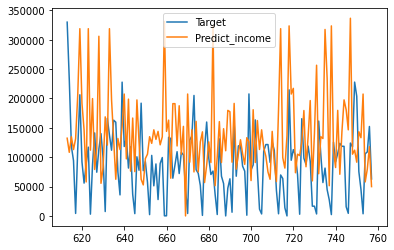

In [ ]:
df_final[['Target','Predict_income']].plot()